In [1]:
import rapids_singlecell as rsc
import anndata as ad
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import os
import cupyx as cpx
import scipy

/mnt/scratch1/miniconda3/envs/rsc-luke/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
adata = ad.read_h5ad('adata_stroma.h5ad')
rsc.get.anndata_to_GPU(adata)

In [3]:
adata.obsm['X_pca'] = adata.obsm['X_pca_harmony']
rsc.pp.neighbors(adata, n_neighbors=30, use_rep='X_pca')
print('neighborhood done!')
rsc.tl.umap(adata)
print('umap done!')
rsc.tl.leiden(adata, resolution=0.5, key_added='leiden_0.5')
rsc.tl.leiden(adata, resolution=1, key_added='leiden_1')
rsc.tl.leiden(adata, resolution=2, key_added='leiden_2')
print('leiden done!')
sc.pl.umap(adata, color=['leiden_0.5', 'batch'], size=2)

neighborhood done!
umap done!
leiden done!


KeyError: 'Could not find key leiden in .var_names or .obs.columns.'

<Figure size 1455.6x480 with 0 Axes>

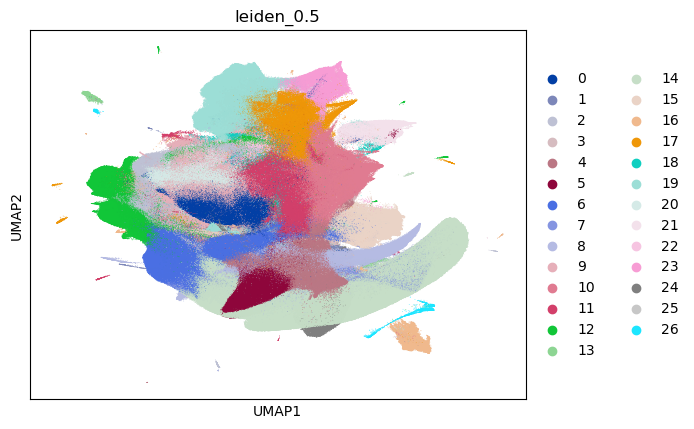

TypeError: Implicit conversion to a NumPy array is not allowed. Please use `.get()` to construct a NumPy array explicitly.

In [6]:
sc.pl.umap(adata, color=['leiden_0.5'], size=1)

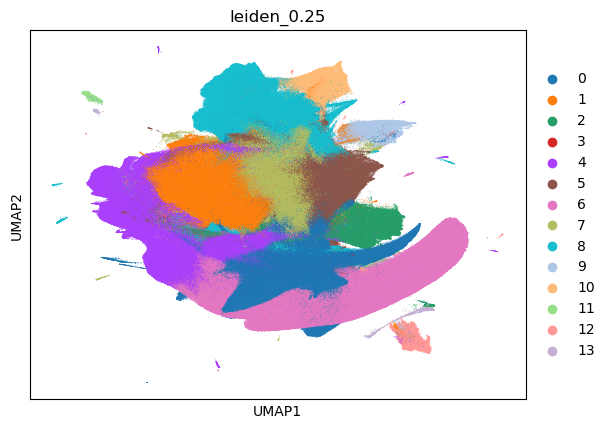

In [8]:
rsc.tl.leiden(adata, resolution=0.25, key_added='leiden_0.25')
sc.pl.umap(adata, color=['leiden_0.25'], size=1)

In [9]:
adata.write_h5ad('adata_stroma.h5ad')